[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

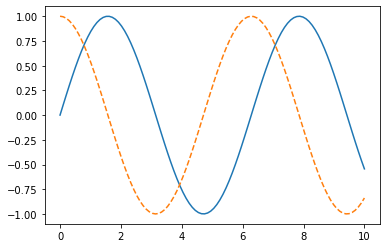

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def main():
    x = np.linspace(0, 10, 100)
    fig = plt.figure()
    plt.plot(x, np.sin(x), '-')
    plt.plot(x, np.cos(x), '--');
    print(x)
    plt.show()
    plt.close()

if __name__ == '__main__':   
    main()

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


In [2]:
from datetime import datetime
import backtrader as bt
import tkinter

try:
    #Quick workaround for avoiding the following error while using cerebro.plot
    #ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running
    %matplotlib
except (KeyboardInterrupt, SystemExit):
    raise
except Exception as e:
    print("Ignoring", e)

import matplotlib

print(matplotlib.get_configdir())
print(matplotlib.get_backend())

# Create a subclass of Strategy to define the indicators and logic
class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.YahooFinanceData(dataname='MSFT',
                                 fromdate=datetime(2017, 1, 1),
                                 todate=datetime.now().date())
print(data)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
 
# cerebro.plot()  # and plot it with a single command
cerebro.plot()
print("strategy end")

Using matplotlib backend: agg
/home/jovyan/.config/matplotlib
agg


ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running